# Geospatial Data Science

## Import Libraries

In [1]:
%matplotlib inline

import requests
import pandas as pd
import geopandas as gpd
import numpy as np
#import googlemaps
from scipy.spatial.distance import cdist

## Gathering Data

In [2]:
url = 'https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2024-09-05/data/listings.csv.gz'

r = requests.get(url)
with open('listings.csv.gz', 'wb') as fo:
    fo.write(r.content)

In [3]:
url = 'https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2024-09-05/data/calendar.csv.gz'
r = requests.get(url)
with open('calendar.csv.gz', 'wb') as fo:
    fo.write(r.content)

cldr = pd.read_csv('calendar.csv.gz')

In [4]:
url = 'https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2024-09-05/data/reviews.csv.gz'
r = requests.get(url)
with open('reviews.csv.gz', 'wb') as fo:
    fo.write(r.content)

reviews = pd.read_csv('reviews.csv.gz')

In [5]:
url = 'https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2024-09-05/visualisations/neighbourhoods.geojson'
r = requests.get(url)
with open('neighbourhoods.geojson', 'wb') as fo:
    fo.write(r.content)

neigh_gpd = gpd.read_file('neighbourhoods.geojson')

In [6]:
neigh_gpd

neighbourhood neighbourhood_group  \
0                             Bijlmer-Oost                None   
1                                Oud-Noord                None   
2                               Noord-Oost                None   
3                               Noord-West                None   
4                 IJburg - Zeeburgereiland                None   
5                             Centrum-West                None   
6   Oostelijk Havengebied - Indische Buurt                None   
7                             Centrum-Oost                None   
8                                 Oud-Oost                None   
9                               Westerpark                None   
10                         Watergraafsmeer                None   
11                   Gaasperdam - Driemond                None   
12                         Bijlmer-Centrum                None   
13                 De Pijp - Rivierenbuurt                None   
14                                    Zuid                None   
15                  Buitenveldert - Zuidas                None   
16                  De Baarsjes - Oud-West                None   
17                           Bos en Lommer                None   
18                 Geuzenveld - Slotermeer                None   
19                             Slotervaart                None   
20                                  Osdorp                None   
21                  De Aker - Nieuw Sloten                None   

                                             geometry  
0   MULTIPOLYGON Z (((4.99167 52.32444 0, 4.99176 ...  
1   MULTIPOLYGON Z (((4.95242 52.38983 0, 4.95242 ...  
2   MULTIPOLYGON Z (((5.07916 52.38865 0, 5.0671 5...  
3   MULTIPOLYGON Z (((4.93072 52.41161 0, 4.93051 ...  
4   MULTIPOLYGON Z (((5.03906 52.35458 0, 5.02022 ...  
5   MULTIPOLYGON Z (((4.9064 52.38004 0, 4.90428 5...  
6   MULTIPOLYGON Z (((4.96131 52.35913 0, 4.95944 ...  
7   MULTIPOLYGON Z (((4.93297 52.37041 0, 4.93296 ...  
8   MULTIPOLYGON Z (((4.93743 52.35774 0, 4.93714 ...  
9   MULTIPOLYGON Z (((4.89508 52.38869 0, 4.89236 ...  
10  MULTIPOLYGON Z (((4.96971 52.35636 0, 4.9696 5...  
11  MULTIPOLYGON Z (((5.02154 52.30246 0, 5.02064 ...  
12  MULTIPOLYGON Z (((4.97184 52.28436 0, 4.97169 ...  
13  MULTIPOLYGON Z (((4.91498 52.34214 0, 4.91496 ...  
14  MULTIPOLYGON Z (((4.88738 52.36023 0, 4.88696 ...  
15  MULTIPOLYGON Z (((4.89907 52.33044 0, 4.89907 ...  
16  MULTIPOLYGON Z (((4.88209 52.36206 0, 4.88123 ...  
17  MULTIPOLYGON Z (((4.86496 52.38896 0, 4.86492 ...  
18  MULTIPOLYGON Z (((4.83945 52.38404 0, 4.83944 ...  
19  MULTIPOLYGON Z (((4.85049 52.36424 0, 4.84918 ...  
20  MULTIPOLYGON Z (((4.82043 52.35174 0, 4.81419 ...  
21  MULTIPOLYGON Z (((4.84713 52.3369 0, 4.84709 5...

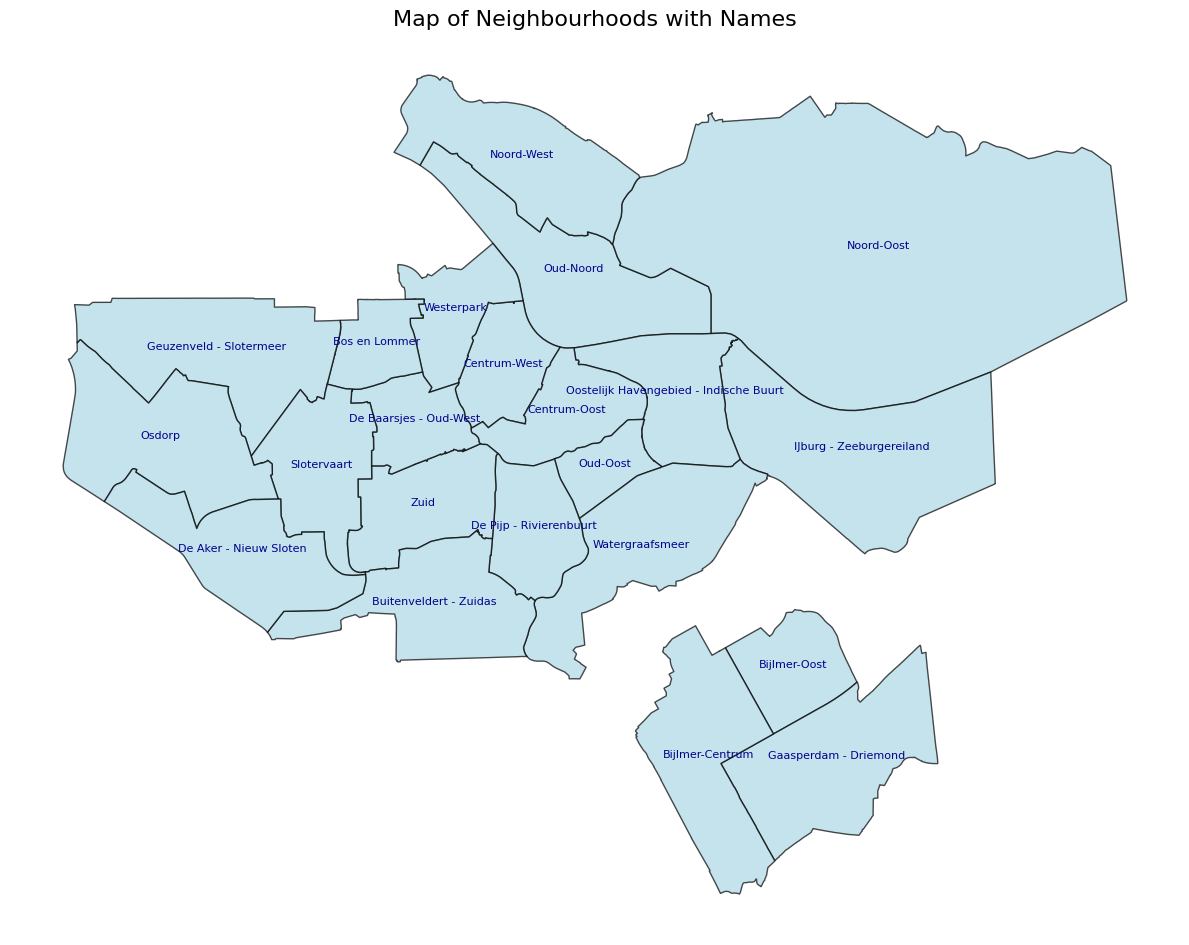

In [7]:
import matplotlib.pyplot as plt

# Plot all geometries
fig, ax = plt.subplots(figsize=(12, 10))
neigh_gpd.plot(ax=ax, edgecolor='black', alpha=0.7, color='lightblue')

# Add neighborhood names as labels
for idx, row in neigh_gpd.iterrows():
    # Use the centroid of the geometry for label placement
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['neighbourhood'], fontsize=8, ha='center', color='darkblue')

# Customize the plot
plt.title("Map of Neighbourhoods with Names", fontsize=16)
plt.axis('off')  # Turn off axis for better visualization
plt.tight_layout()
plt.show()


# contoh 

In [9]:
# parse price

In [10]:
cldr[cldr['listing_id']==2818].describe()

listing_id  adjusted_price  minimum_nights  maximum_nights
count       365.0             0.0      365.000000           365.0
mean       2818.0             NaN        3.038356          1125.0
std           0.0             NaN        0.274678             0.0
min        2818.0             NaN        3.000000          1125.0
25%        2818.0             NaN        3.000000          1125.0
50%        2818.0             NaN        3.000000          1125.0
75%        2818.0             NaN        3.000000          1125.0
max        2818.0             NaN        5.000000          1125.0

In [11]:
lst = pd.read_csv('listings.csv.gz')
lst['priceN'] = lst['price'].apply(
                    lambda x: float(str(x)\
                                    .replace(',', '')\
                                    .strip('$')))
lst['l_price'] = np.log(lst['priceN'])

In [12]:
import geopandas as gpd
listing_gpd = gpd.GeoDataFrame(lst, geometry = gpd.points_from_xy(lst.longitude,lst.latitude), crs='epsg:4326')

In [13]:
listing_gpd.head(2)

id                           listing_url       scrape_id last_scraped  \
0  6624170  https://www.airbnb.com/rooms/6624170  20240905174946   2024-09-05   
1  8837071  https://www.airbnb.com/rooms/8837071  20240905174946   2024-09-05   

            source                                 name  \
0  previous scrape  Warm, cozy sunlighted downtown appt   
1  previous scrape        Cozy apartment in city center   

                                         description neighborhood_overview  \
0  2 room appt. 1.8 km from central station with ...                   NaN   
1  Located in Amsterdam's sweet spot. A stone's t...         see the guide   

                                         picture_url   host_id  ...  \
0  https://a0.muscache.com/pictures/df91da10-f7d4...  34670170  ...   
1  https://a0.muscache.com/pictures/5fee12d4-61d0...  13034277  ...   

                    license instant_bookable calculated_host_listings_count  \
0  0363 3CF3 3233 3B24 6BEC                f                              1   
1  0363 0C20 1768 FAAA 3556                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month priceN  \
0                                           0              0.38    NaN   
1                                           0               NaN    NaN   

  l_price                  geometry  
0     NaN  POINT (4.92438 52.36842)  
1     NaN  POINT (4.87712 52.36455)  

[2 rows x 78 columns]

In [15]:
ams = []
listing_gpd['pool'] = 0
listing_gpd['count_amenities'] = 0
for i in range(listing_gpd.shape[0]):
    r = listing_gpd.loc[i, 'amenities']
    pcs = r.strip('{').strip('}').split(',')
    ams.extend(pcs)
    listing_gpd.loc[i,'count_amenities'] = len(pcs)
    if 'Pool' in pcs:
        listing_gpd.loc[i, 'pool'] = 1
#set(ams)

In [16]:
listing_gpd.head(2)

id                           listing_url       scrape_id last_scraped  \
0  6624170  https://www.airbnb.com/rooms/6624170  20240905174946   2024-09-05   
1  8837071  https://www.airbnb.com/rooms/8837071  20240905174946   2024-09-05   

            source                                 name  \
0  previous scrape  Warm, cozy sunlighted downtown appt   
1  previous scrape        Cozy apartment in city center   

                                         description neighborhood_overview  \
0  2 room appt. 1.8 km from central station with ...                   NaN   
1  Located in Amsterdam's sweet spot. A stone's t...         see the guide   

                                         picture_url   host_id  ...  \
0  https://a0.muscache.com/pictures/df91da10-f7d4...  34670170  ...   
1  https://a0.muscache.com/pictures/5fee12d4-61d0...  13034277  ...   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month priceN  \
0                                           0              0.38    NaN   
1                                           0               NaN    NaN   

  l_price                  geometry pool count_amenities  
0     NaN  POINT (4.92438 52.36842)    0              18  
1     NaN  POINT (4.87712 52.36455)    0              11  

[2 rows x 80 columns]

In [17]:
listing_gpd.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca